In [1]:
import os
directory_folder='temp'
for filename in os.listdir(directory_folder):
    if os.path.isfile(os.path.join(directory_folder, filename)):
        os.remove(os.path.join(directory_folder, filename))

In [4]:
import pytesseract
import cv2
image = cv2.imread("E-receipt-Dataset\scb\IMG_0701.JPG")
# cropim = image[27:1269,326:1677]
cropim = image[326:1677,27:1269]

cv2.imwrite("temp/0scb_crop.png",cropim)

True

In [5]:

gray = cv2.cvtColor(cropim,cv2.COLOR_BGR2GRAY)
cv2.imwrite("temp/1scb_gray.png",gray)
blur=cv2.GaussianBlur(gray,(7,7),0)
cv2.imwrite("temp/2scb_blur.png",blur)


True

In [13]:
for i in range(0,250,5):
    thresh=cv2.threshold(blur,i,255,cv2.THRESH_BINARY_INV)[1]
    cv2.imwrite(f"temp/3scb_thresh_white{i}.png",thresh)

In [7]:

thresh= cv2.imread(r"temp\3scb_thresh200.png")

In [8]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT,(3,8))
cv2.imwrite('temp/4scb_kernal.png',kernal)
dilate = cv2.dilate(thresh,kernal,iterations=2)
cv2.imwrite('temp/5scb_dilate.png',dilate)


True

In [9]:
dilate_gray = cv2.cvtColor(dilate, cv2.COLOR_BGR2GRAY)


In [10]:
dilate.dtype

dtype('uint8')

In [11]:
cnts = cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
# cnts, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts,key=lambda x: cv2.boundingRect(x)[0])
for c in cnts:
    x, y, w, h =cv2.boundingRect(c)
    cv2.rectangle(image, (x,y),(x+w,y+h),(36,255,12),10)
    cv2.imwrite('temp/6scb_box.png',image)



error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


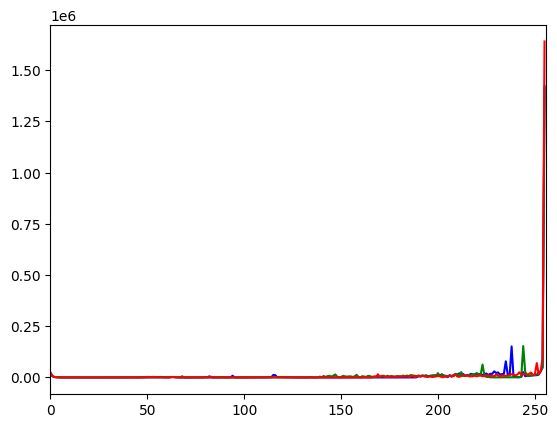

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

file0 = 'E-receipt-Dataset\scb\IMG_0701.JPG'
img = cv2.imread(file0)
color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

array([[[190, 139, 167],
        [190, 139, 167],
        [190, 139, 167],
        ...,
        [190, 139, 167],
        [190, 139, 167],
        [190, 139, 167]],

       [[190, 139, 167],
        [190, 139, 167],
        [190, 139, 167],
        ...,
        [190, 139, 167],
        [190, 139, 167],
        [190, 139, 167]],

       [[190, 139, 167],
        [190, 139, 167],
        [190, 139, 167],
        ...,
        [190, 139, 167],
        [191, 140, 168],
        [191, 140, 168]],

       ...,

       [[238, 244, 255],
        [238, 244, 255],
        [238, 244, 255],
        ...,
        [238, 244, 255],
        [238, 244, 255],
        [238, 244, 255]],

       [[238, 244, 255],
        [238, 244, 255],
        [238, 244, 255],
        ...,
        [238, 244, 255],
        [238, 244, 255],
        [238, 244, 255]],

       [[238, 244, 255],
        [238, 244, 255],
        [238, 244, 255],
        ...,
        [238, 244, 255],
        [238, 244, 255],
        [238, 244, 255]]

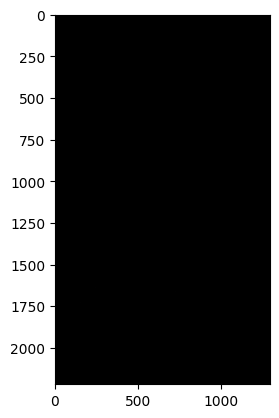

In [31]:
import cv2
import numpy as np

def extract_text(image_path, text_colors):
    # Read the image
    image = cv2.imread(image_path)
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a mask for each text color
    masks = []
    for color in text_colors:
        lower_bound = np.array(color, dtype=np.uint8)
        upper_bound = np.array(color, dtype=np.uint8)
        mask = cv2.inRange(image_rgb, lower_bound, upper_bound)
        masks.append(mask)

    # Combine masks to get the final mask
    final_mask = np.zeros_like(masks[0])
    for mask in masks:
        final_mask |= mask

    # Extract text using the final mask
    extracted_text = cv2.bitwise_and(image, image, mask=final_mask)

    return extracted_text

# Specify the path to your image
image_path ='E-receipt-Dataset\scb\IMG_0703.JPG'

# Specify the text colors you're interested in
text_colors = [
    [39, 39, 39],  # Black
    [116, 112, 122],  # Gray
    [64, 185, 78]  # Green
]

# Extract text of specified colors
result = extract_text(image_path, text_colors)

# Display the result
# cv2.imshow('Extracted Text', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(result)
plt.show()


In [ ]:
import pytesseract
import cv2
image = cv2.imread(r"temp\3scb_thresh200.png")
# cropim = image[27:1269,326:1677]
# cropim = image[326:1677,27:1269]

ocrresult = pytesseract.image_to_string(image,lang="tha+eng")
print(ocrresult)


In [14]:
import pytesseract
import cv2

# Set the path to your folder
folder_path = "temp"

# Specify the range for the loop
for i in range(0, 250, 5):
    # Generate the filename based on the pattern
    filename = f"{folder_path}\\3scb_thresh_white{i}.png"

    # Read the image
    image = cv2.imread(filename)

    # Perform OCR on the image
    ocr_result = pytesseract.image_to_string(image, lang="tha+eng")

    # Append the OCR result to a text file
    with open("03_ocr_white_results.txt", "a", encoding="utf-8") as file:
        file.write(f"File: {filename}\n")
        file.write(f"OCR Result: {ocr_result}\n\n")

print("OCR results have been written to ocr_results.txt")


OCR results have been written to ocr_results.txt


In [ ]:
import pytesseract
import cv2

# Set the path to your folder
folder_path = "temp"

# Specify the range for the loop
for i in range(0, 250, 5):
    # Generate the filename based on the pattern
    filename = f"{folder_path}\\3scb_thresh_white{i}.png"

    # Read the image
    image = cv2.imread(filename)

    # Perform OCR on the image
    ocr_result = pytesseract.image_to_string(image, lang="tha+eng")

    # Append the OCR result to a text file
    with open("03_ocr_white_results.txt", "a", encoding="utf-8") as file:
        file.write(f"File: {filename}\n")
        file.write(f"OCR Result: {ocr_result}\n\n")

print("OCR results have been written to ocr_results.txt")
